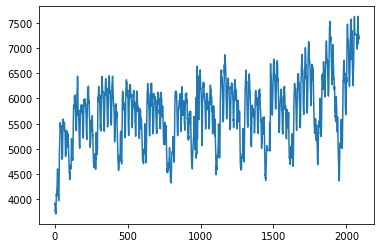

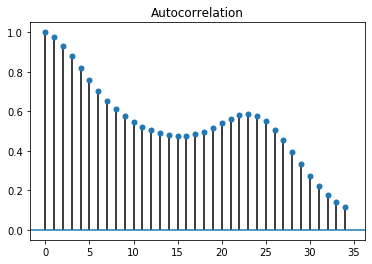

P-value is 8.235852354136773e-09
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 2086
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -13314.724
Method:                       css-mle   S.D. of innovations            143.145
Date:                Tue, 31 Mar 2020   AIC                          26643.448
Time:                        20:55:58   BIC                          26682.949
Sample:                             2   HQIC                         26657.921
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      1.420      0.001      0.999      -2.782       2.784
ar.L1.D2.y    -0.5123      0.022    -23.446      0.000      -0.555      -0.469
ar.L2.D2.y    -0.38

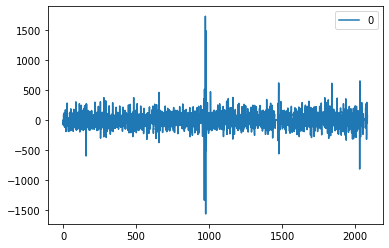

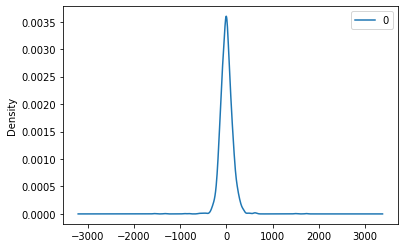

                 0
count  2086.000000
mean     -0.019237
std     143.180420
min   -1561.535312
25%     -80.397142
50%      -3.591967
75%      73.122676
max    1731.817473


In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,2].values
# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()
# Plot autocorrelation function
plot_acf(demand, alpha =1 )
plt.show()
#Dickey fuller test
results = adfuller(demand)
print("P-value is", results[1])
# fit model
model = ARIMA(demand, order=(5,2,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
# there may still be some trend information not captured by the model.
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# the errors are Gaussian
residuals.plot(kind='kde')
plt.show()
# The distribution of the residual errors is displayed. 
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).
print(residuals.describe())



predicted=7811.012086, expected=7583.570000
predicted=7640.381882, expected=7403.400000
predicted=7389.190147, expected=7263.830000
predicted=7177.751819, expected=7286.250000
predicted=7249.553110, expected=7270.250000
predicted=7238.649215, expected=7271.000000
predicted=7261.924897, expected=7271.000000
predicted=7247.209778, expected=7271.000000
predicted=7264.023368, expected=7271.000000
predicted=7271.411590, expected=7271.000000
predicted=7270.070579, expected=7271.000000
predicted=7271.055726, expected=7271.000000
predicted=7271.009757, expected=7271.000000
predicted=7271.007787, expected=7271.000000
predicted=7271.009057, expected=7271.000000
predicted=7271.009584, expected=7271.000000
predicted=7271.007415, expected=7271.000000
predicted=7271.007959, expected=7141.670000
predicted=7078.674367, expected=6984.250000
predicted=6890.899458, expected=7098.170000
predicted=7099.141578, expected=7151.670000
predicted=7150.828722, expected=7423.170000
predicted=7585.081364, expected=

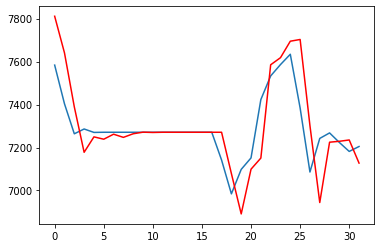

,Pred
0,7811.012086
1,7640.381882
2,7389.190147
3,7177.751819
4,7249.553110
5,7238.649215
6,7261.924897
7,7247.209778
8,7264.023368
9,7271.411590


In [97]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [99]:
model = ARIMA(demand, order=(5,2,0))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,7189.253373
1,7185.382736
2,7186.634529
3,7177.220564
4,7170.563809
5,7166.991603
6,7160.698649
7,7155.283270
8,7150.430718
9,7144.722910
